# Assignment

## Loading

In [9]:
import os
import torch
from torchvision import transforms 
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import re
import pandas as pd
from io import StringIO

from torch.utils.data import Dataset


In [10]:

FILENAME = 'train.csv'
with open(FILENAME) as file:
    lines = [re.sub(r'([^,])"(\s*[^\n])', r'\1/"\2', line) for line in file]
    df_train = pd.read_csv(StringIO(''.join(lines)), escapechar="/")

In [11]:

FILENAME = 'test.csv'
with open(FILENAME) as file:
    lines = [re.sub(r'([^,])"(\s*[^\n])', r'\1/"\2', line) for line in file]
    df_test = pd.read_csv(StringIO(''.join(lines)), escapechar="/")

In [7]:
x = torch.load("/Users/matteo/Documents/Università/Third_Year/Second_Semester/Deep_Learning/image_classification_with_caption/images_tensor_10000.pt")

In [8]:
x

tensor([[[[0.4000, 0.4000, 0.4039,  ..., 0.2157, 0.2157, 0.2157],
          [0.4039, 0.4078, 0.4078,  ..., 0.2353, 0.2235, 0.2196],
          [0.4157, 0.4157, 0.4196,  ..., 0.2667, 0.2627, 0.2588],
          ...,
          [0.2431, 0.2392, 0.2431,  ..., 0.3922, 0.3647, 0.3725],
          [0.2078, 0.2000, 0.2118,  ..., 0.3765, 0.3569, 0.3686],
          [0.1725, 0.1725, 0.1804,  ..., 0.4118, 0.3882, 0.3882]],

         [[0.6588, 0.6588, 0.6627,  ..., 0.3255, 0.3255, 0.3255],
          [0.6627, 0.6667, 0.6667,  ..., 0.3529, 0.3412, 0.3373],
          [0.6745, 0.6745, 0.6784,  ..., 0.3882, 0.3804, 0.3843],
          ...,
          [0.5020, 0.5059, 0.5020,  ..., 0.3804, 0.3529, 0.3686],
          [0.4941, 0.4941, 0.4941,  ..., 0.3922, 0.3725, 0.3882],
          [0.4824, 0.4863, 0.4902,  ..., 0.4392, 0.4157, 0.4235]],

         [[0.6549, 0.6549, 0.6588,  ..., 0.2902, 0.2902, 0.2902],
          [0.6588, 0.6627, 0.6627,  ..., 0.3333, 0.3216, 0.3176],
          [0.6706, 0.6706, 0.6745,  ..., 0

The following code was used to create the df_train.csv file which we then we reload. 
We do not run it, as we already have the csv file.

In [26]:
"""
for i in range(df_train.shape[0]):
    df_train.Labels[i] = [int(j) for j in df_train.Labels[i].split()]

max_i = 0
for i in df_train.Labels:
    max_i = max(max_i, max(i))

min_i = 19
for i in df_train.Labels:
    min_i = min(min_i, min(i))
min_i

for i in range(1, max_i+1):
    df_train[f'{i}'] = 0

for i in range(df_train.shape[0]):
    for j in df_train.Labels[i]:
        df_train[f"{j}"][i] = 1

        
df_train.to_csv('df_train.csv')
"""

'\nfor i in range(df_train.shape[0]):\n    df_train.Labels[i] = [int(j) for j in df_train.Labels[i].split()]\n\nmax_i = 0\nfor i in df_train.Labels:\n    max_i = max(max_i, max(i))\n\nmin_i = 19\nfor i in df_train.Labels:\n    min_i = min(min_i, min(i))\nmin_i\n\nfor i in range(1, max_i+1):\n    df_train[f\'{i}\'] = 0\n\nfor i in range(df_train.shape[0]):\n    for j in df_train.Labels[i]:\n        df_train[f"{j}"][i] = 1\ndf_train\n'

In [29]:
df_train = pd.read_csv('df_train.csv', index_col=0)
df_train

,ImageID,Labels,Caption,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,19
0,0.jpg,[1],Woman in swim suit holding parasol on sunny day.,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.jpg,"[1, 19]",A couple of men riding horses on top of a gree...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2.jpg,[1],They are brave for riding in the jungle on tho...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.jpg,"[8, 3, 13]",a black and silver clock tower at an intersect...,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,4.jpg,"[8, 3, 7]",A train coming to a stop on the tracks out side.,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29991,29995.jpg,"[8, 1, 2]",A picture of a truck that is in the middle of ...,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29992,29996.jpg,[1],A plate topped with a pizza being cut with a s...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29993,29997.jpg,[1],A man riding a snowboard on top of snow.,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29994,29998.jpg,[1],This photo shows people skiing in the mountains.,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## NN structures

In [ ]:
class AlexNet(nn.Module):
    def __init__(self, num_classes: int = 10, dropout: float = 0.5, num_filters = 1) -> None:
        super().__init__()
        self.features = nn.Sequential(
        nn.Conv2d(3, int(64*num_filters), kernel_size=11, stride=4, padding=2),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=3, stride=2),
        nn.Conv2d(int(64*num_filters), int(192*num_filters), kernel_size=5, padding=2),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=3, stride=2),
        nn.Conv2d(int(192*num_filters), int(384*num_filters), kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(int(384*num_filters), int(256*num_filters), kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(int(256*num_filters), int(256*num_filters), kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=3, stride=2),
        )


        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))

        self.classifier = nn.Sequential(
            nn.Dropout(p=dropout),
            nn.Linear(int(256*num_filters) * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

        self.sigm = nn.Sigmoid()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        x = self.sigm(x)
        return x

def train(criterion, model, loader, optimizer, device=None):
    model.train()
    N = len(loader)
    for i, (images, labels) in enumerate(loader): 
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

def eval_loss_and_error(criterion, model, loader, device=None):
    model.eval()
    l, accuracy, ndata = 0, 0, 0
    with torch.no_grad():
        for data, target in loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            l += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            accuracy += pred.eq(target.view_as(pred)).sum().item()
            ndata += len(data)
    
    return l/ndata, accuracy/ndata*100

In [ ]:
from torchvision import models
# Use the torchvision's implementation of ResNeXt, but add FC layer for a different number of classes (27) and a Sigmoid instead of a default Softmax.
class Resnext50(nn.Module):
    def __init__(self, n_classes):
        super().__init__()
        resnet = models.resnext50_32x4d(pretrained=True).to(device=device)
        resnet.fc = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(in_features=resnet.fc.in_features, out_features=n_classes)
        )
        self.base_model = resnet
        self.sigm = nn.Sigmoid()
 
    def forward(self, x):
        return self.sigm(self.base_model(x))
 
# Initialize the model
model = Resnext50(19)
model = model.to(device)
# Switch model to the training mode
model.train()

## DataLoader

In [41]:
class ImageDataset(Dataset):
    def __init__(self, images, csv, train, test):
        self.csv = csv # df_train
        self.train = train # boolean
        self.test = test # boolean
        self.images = images

        self.all_image_names = self.csv[:]['ImageID']
        self.captions = self.csv[:]['Caption']

        self.all_labels = np.array(self.csv.drop(['ImageID', 'Labels', 'Caption'], axis=1))

        self.train_ratio = int(0.85 * len(self.csv))
        self.valid_ratio = len(self.csv) - self.train_ratio

        # set the training data images and labels
        if self.train == True:
            print(f"Number of training images: {self.train_ratio}")
            self.image_names = list(self.all_image_names[:self.train_ratio])
            self.labels = list(self.all_labels[:self.train_ratio])
            # define the training transforms
            self.transform = transforms.Compose([
                transforms.RandomHorizontalFlip(p=0.5),
                transforms.RandomRotation(degrees=45)
            ])
        # set the validation data images and labels
        elif self.train == False and self.test == False:
            print(f"Number of validation images: {self.valid_ratio}")
            self.image_names = list(self.all_image_names[-self.valid_ratio:])
            self.labels = list(self.all_labels[-self.valid_ratio:])
            # define the validation transforms
            self.transform = transforms.Compose([
            ])
        # set the test data images and labels, only last 10 images
        # this, we will use in a separate inference script
        elif self.test == True and self.train == False:
            self.image_names = list(self.all_image_names[:])
            self.labels = list(self.all_labels[:])
             # define the test transforms
            self.transform = transforms.Compose([
            ])
    def __len__(self):
        return len(self.image_names)
    
    def __getitem__(self, index):
        image = self.images[index]
        image = self.transform(image)
        targets = self.labels[index]
        caption = self.captions[index]
        
        return {
            'image': torch.tensor(image, dtype=torch.float32),
            'label': torch.tensor(targets, dtype=torch.float32),
            'caption' : caption
        }

In [ ]:
train_data = ImageDataset(x, df_train, train = True, test = False)

valid_data = ImageDataset(x, df_train, train = False, test = False)

batch_size = 32

train_loader = Dataset(
    train_data, batch_size=batch_size,
    shuffle=True, drop_last=True)

valid_loader = Dataset(
    valid_data, batch_size=batch_size,
    shuffle=True, drop_last=True)

In [56]:
#4790
l = []
for i in range(len(df_train['Caption'])):
    if "?" in df_train['Caption'][i]:
        l.append(i+1)



l , df_train['Caption'][5325]


([5326, 10750, 24536, 27767, 28048, 28986, 29434],
 'Is he attempting to drill a hole on the baseball field?')

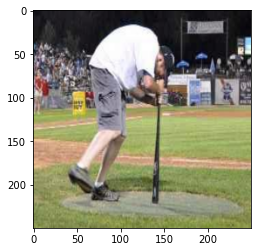

In [53]:
plt.imshow(x[5326].permute(1, 2, 0))
plt.show()